### Titanic Classsification

In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn import metrics 


### 

### Load the titanic dataset

In [113]:
titanic_data=pd.read_csv(r"C:\Users\akshu\Downloads\tested.csv")

In [114]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [115]:
titanic_data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
titanic_data.shape


(418, 12)

In [117]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [118]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [119]:
titanic_data["Sex"].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object>

In [120]:
titanic_data.head
(10)

10

In [121]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Feature Engineering

In [122]:
titanic_data["Gender"]=np.where(titanic_data["Sex"]=="female",0,1)

In [123]:
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1


In [124]:
titanic_data.drop(columns=["Sex"],inplace=True)

In [125]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Gender           0
dtype: int64

<AxesSubplot:>

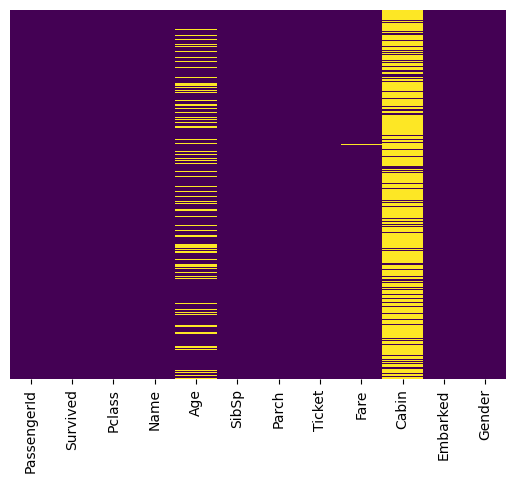

In [126]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### Dropped cabin because its not imp in our model

In [127]:
titanic_data.drop(columns=["Cabin"],inplace=True)

In [128]:
titanic_data["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [129]:
titanic_data["Embarked"].isnull().sum()

0

In [130]:
titanic_data.drop(columns=["PassengerId"],inplace=True)

### Converting Embarked value into numerical form

In [131]:
titanic_data["Embarked_2"]=titanic_data["Embarked"].map({"S":0,"C":1,"Q":2})

In [132]:
titanic_data.drop(columns=["Embarked"],inplace=True)

In [133]:
titanic_data["Age"]=titanic_data["Age"].fillna(20)

In [134]:
titanic_data["Embarked_2"]=titanic_data["Embarked_2"].fillna(1.0)

In [135]:
titanic_data.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_2
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,2
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,2
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0
5,0,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,1,0
6,1,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,0,2
7,0,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,1,0
8,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,0,1
9,0,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,1,0


### EDA

In [136]:
def unvariate_num (data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean1=round(data[x].mean(),2)
    var1=round(data[x].var(),2)
    std1=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75),2)
    skew1=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing":missing,"min":min1,"max":max1,"mean":mean1,"var":var1,"std":std1,"range":range1,"q1":q1,"q2":q2,"q3":q3,"skewness":skew1,"kurtosis":kurt}
    
    
    plt.hist(data[x])
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

In [137]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Gender', 'Embarked_2'],
      dtype='object')

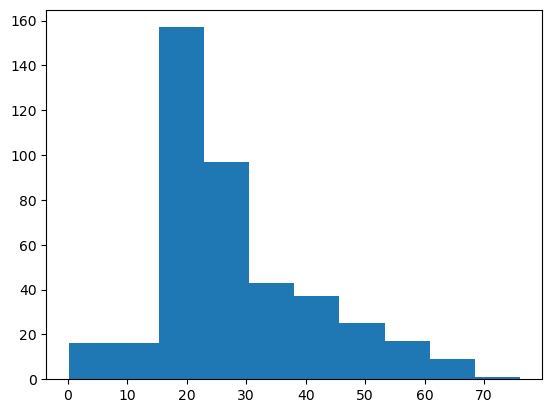

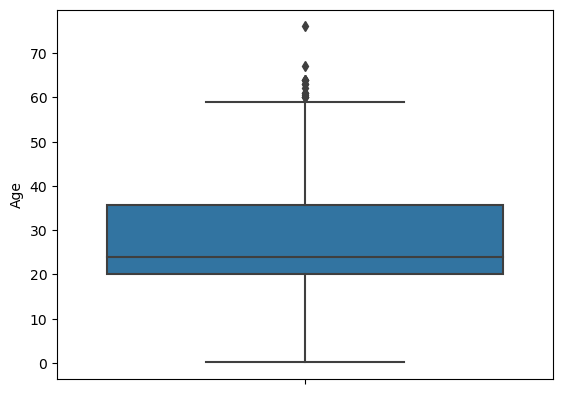

{'missing': 0,
 'min': 0.17,
 'max': 76.0,
 'mean': 28.16,
 'var': 176.92,
 'std': 13.3,
 'range': 75.83,
 'q1': 20.0,
 'q2': 24.0,
 'q3': 35.75,
 'skewness': 0.83,
 'kurtosis': 0.61}

In [138]:
unvariate_num(titanic_data,"Age")

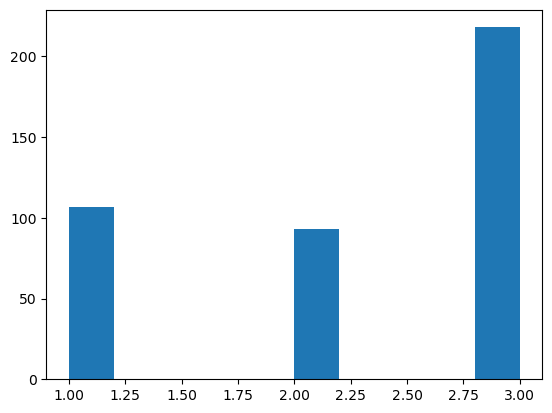

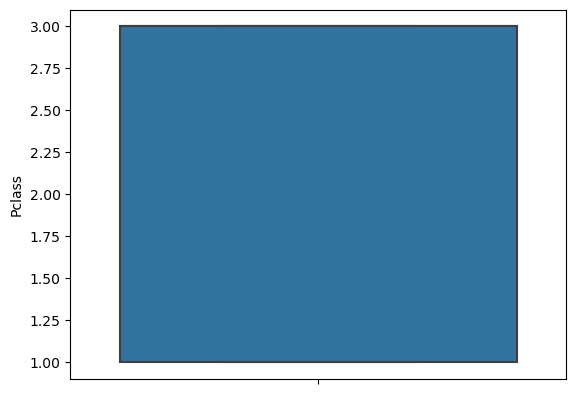

{'missing': 0,
 'min': 1,
 'max': 3,
 'mean': 2.27,
 'var': 0.71,
 'std': 0.84,
 'range': 2,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 3.0,
 'skewness': -0.53,
 'kurtosis': -1.38}

In [139]:
unvariate_num(titanic_data,"Pclass")

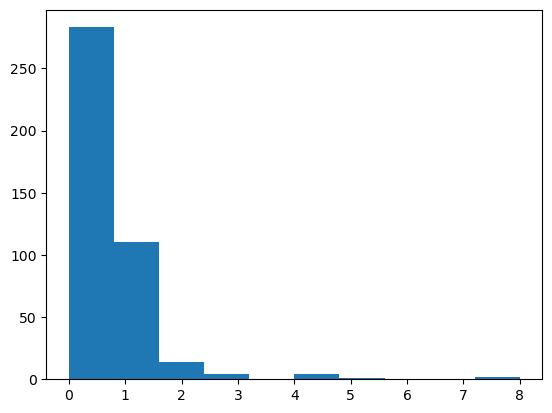

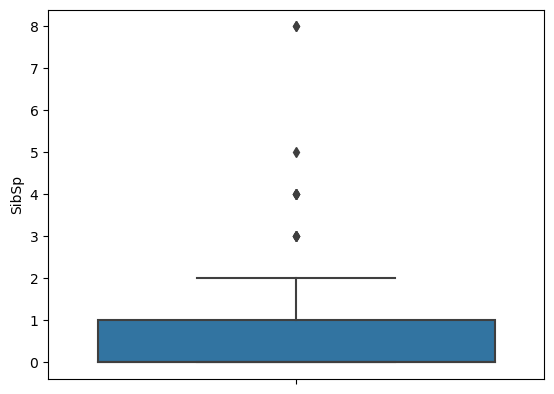

{'missing': 0,
 'min': 0,
 'max': 8,
 'mean': 0.45,
 'var': 0.8,
 'std': 0.9,
 'range': 8,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 4.17,
 'kurtosis': 26.5}

In [140]:
unvariate_num(titanic_data,"SibSp")

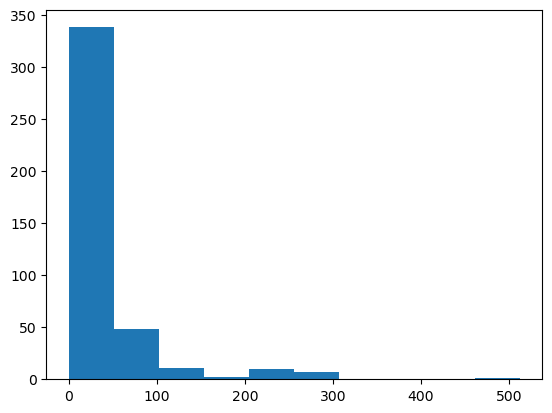

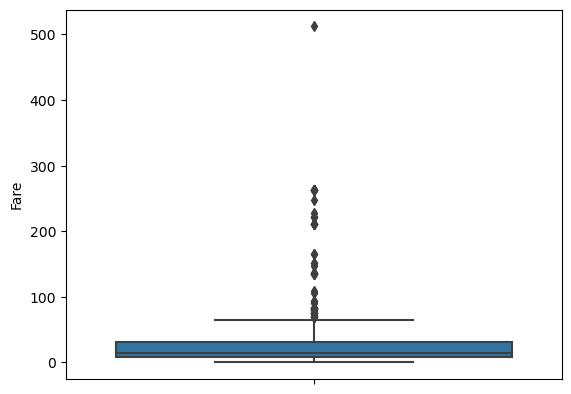

{'missing': 1,
 'min': 0.0,
 'max': 512.33,
 'mean': 35.63,
 'var': 3125.66,
 'std': 55.91,
 'range': 512.33,
 'q1': 7.9,
 'q2': 14.45,
 'q3': 31.5,
 'skewness': 3.69,
 'kurtosis': 17.92}

In [141]:
unvariate_num(titanic_data,"Fare")


### Exploring data with different graphs

In [142]:
sns.countplot(x="Sib
              Sp",data=titanic_data)

SyntaxError: EOL while scanning string literal (196994099.py, line 1)

<AxesSubplot:xlabel='Fare', ylabel='count'>

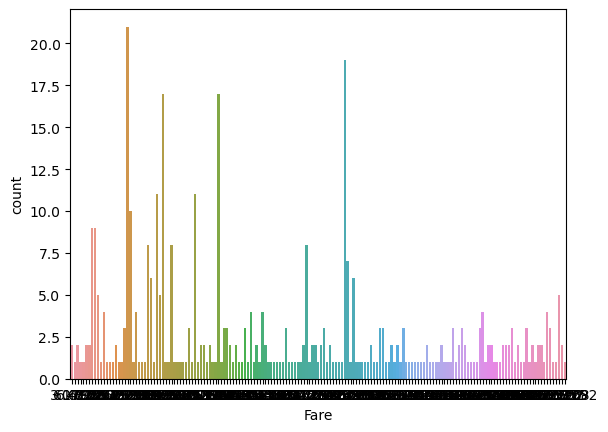

In [143]:
sns.countplot(x="Fare",data=titanic_data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

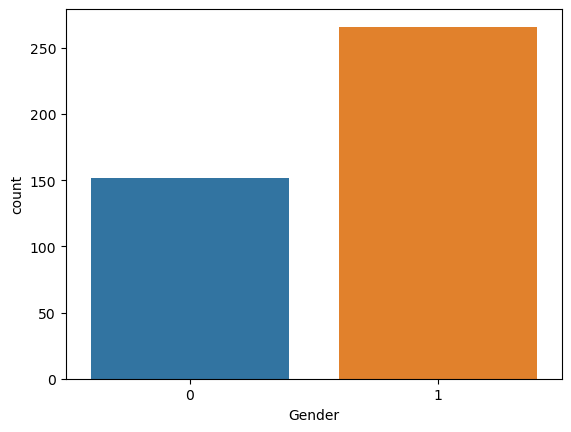

In [144]:
sns.countplot(x="Gender",data=titanic_data)

<AxesSubplot:>

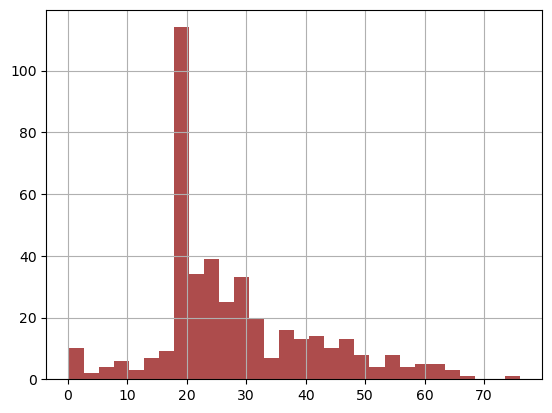

In [145]:
titanic_data["Age"].hist(bins=30,color="darkred",alpha=0.7)

### outlier Treatment

In [146]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Gender', 'Embarked_2'],
      dtype='object')

In [147]:
var="SibSp"
q1=titanic_data[var].quantile[.25]
q3=titanic_data[var].quantile[.75]
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3=1.5*(q3-q1)
titanic_data[var]=np.where(titanic_data[var]>=upper_cap,upper_cap,titanic_data[var])
titanic_data[var]=np.where(titanic_data[var]<=lower_cap,lower_cap,titanic_data[var])

TypeError: 'method' object is not subscriptable

In [ ]:
var="Fare"
q1=titanic_data[var].quantile[.25]
q3=titanic_data[var].quantile[.75]
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3=1.5*(q3-q1)
titanic_data[var]=np.where(titanic_data[var]>=upper_cap,upper_cap,titanic_data[var])
titanic_data[var]=np.where(titanic_data[var]<=lower_cap,lower_cap,titanic_data[var])

In [109]:
var="Age"
q1=titanic_data[var].quantile[.25]
q3=titanic_data[var].quantile[.75]
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3=1.5*(q3-q1)
titanic_data[var]=np.where(titanic_data[var]>=upper_cap,upper_cap,titanic_data[var])
titanic_data[var]=np.where(titanic_data[var]<=lower_cap,lower_cap,titanic_data[var])

TypeError: 'method' object is not subscriptable

### checkung muticolinearity

In [148]:
titanic_data.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_2
0,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,2
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0
2,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,2
3,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0


In [149]:
titanic_data1=titanic_data[titanic_data.dtypes[titanic_data.dtypes!="object"].index]

In [150]:
titanic_data1

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_2
0,0,3,34.5,0,0,7.8292,1,2
1,1,3,47.0,1,0,7.0000,0,0
2,0,2,62.0,0,0,9.6875,1,2
3,0,3,27.0,0,0,8.6625,1,0
4,1,3,22.0,1,1,12.2875,0,0
...,...,...,...,...,...,...,...,...
413,0,3,20.0,0,0,8.0500,1,0
414,1,1,39.0,0,0,108.9000,0,1
415,0,3,38.5,0,0,7.2500,1,0
416,0,3,20.0,0,0,8.0500,1,0


In [151]:
titanic_data1.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Gender        0
Embarked_2    0
dtype: int64

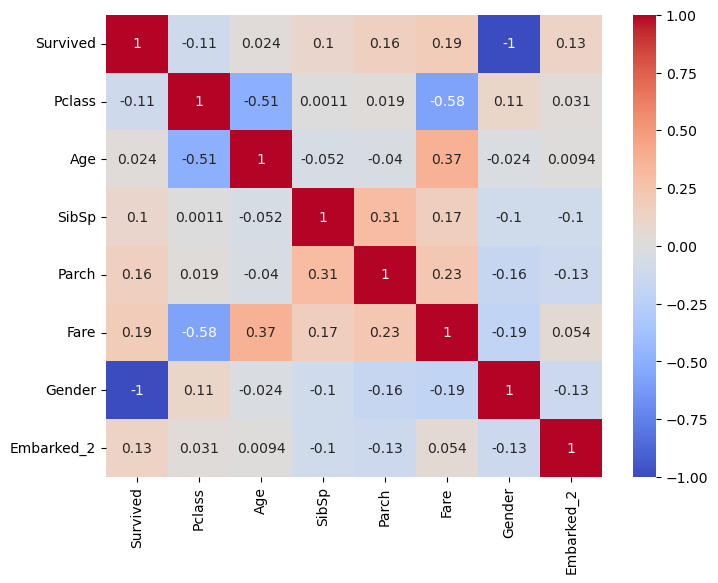

In [152]:
cr=titanic_data1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

### Model Development

In [154]:
titanic_data1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender',
       'Embarked_2'],
      dtype='object')